## Tutorial for Basic Instructional Package for Weather Forecaters @ WMO-RTC, Lagos, Nigeria

#### Instructor: Temidayo Popoola

### Program to visualize and animate dust event over `West Africa ans Spain` for 5-7 February 2021.

### Module outline
* [1 - Load and browse Metop-A GOME-2 Level 3 AAI data](#load_browse_gome2)
* [2 - Concatenate the data from the three satellites Metop-A, -B and -C](#concat_gome2)
* [3 - Retrieve  time coordinate information and assign time coordinates to the time dimension](#assign_time_coord_gome2)
* [4 - Combine AAI data from the three satellites Metop-A, -B, and -C onto one single grid](#combine_gome2)
* [5 - Visualize AAI data with data from the three satellites Metop-A, -B, and C combined on one single grid](#visualize_gome2)
* [6 - Animate daily Metop-A/B/C GOME-2 Level 3 Absorbed Aerosol Index (AAI) data for 5 to 7 February 2021](#animate_gome2)



##### Load required libraries

In [1]:
import os
from netCDF4 import Dataset
import xarray as xr
import numpy as np
import pandas as pd
from datetime import datetime
#import ffmpeg

from IPython.display import HTML

# Python libraries for visualisation
from matplotlib import pyplot as plt
from matplotlib import animation
import ipynb


import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [4]:
%run ../functions.ipynb

## <a id='load_browse_gome2'></a>1. Load and browse Metop-A GOME-2 Level 3 AAI data

In [5]:
file = 'ESACCI-AEROSOL-L3-AAI-GOME2A-1D-20210205-fv1.8.nc'
aai_gome2a = xr.open_dataset(file)
aai_gome2a

<xarray.Dataset>
Dimensions:                  (longitude: 360, latitude: 180)
Coordinates:
  * longitude                (longitude) float32 -179.5 -178.5 ... 178.5 179.5
  * latitude                 (latitude) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables:
    absorbing_aerosol_index  (latitude, longitude) float32 ...
    number_of_observations   (latitude, longitude) int16 ...
    solar_zenith_angle       (latitude, longitude) float32 ...
Attributes: (12/32)
    Conventions:                CF-1.6
    title:                      ESA CCI absorbing aerosol index level 3 product
    description:                Multi-Sensor AAI field for 05-02-2021
    institution:                Royal Netherlands Meteorological Institute (K...
    project:                    Climate Change Initiative - European Space Ag...
    references:                 http://www.esa-aerosol-cci.org
    ...                         ...
    geospatial_lon_resolution:  1.0
    geospatial_lat_units:       degrees_north
    geospatial_lon_units:       degrees_east
    comment:                    Sun glint and solar eclipse events were filte...
    license:                    ESA CCI Data Policy: free and open access
    summary:                    This dataset contains absorbing aerosol index...

### Load a time-series of daily Metop-A GOME-2 Level 3 AAI data into one `xarray.Dataset`

The xarray `open_mfdataset()` function allows the opening of multiple files at once. You have to specify the dimension the files shall be concatenated by. It can be an existing dimension within the data file or a new dimension, which is newly specified.

Let us open the daily gridded AAI data from Metop-A for the 3 days from 5 to 7 February 2021. We specify `time` as a new dimension that the data files shall be concatenated by. After you loaded the multiple files in a `Dataset` with the function `open_mfdataset()`, you have to select `absorbing_aerosol_index` again as the variable of interest.

The resulting `xarray.DataArray` has three dimensions (`time`, `latitude` and `longitude`).


In [6]:
ds_a = xr.open_mfdataset('ESACCI-AEROSOL-L3-AAI-GOME2A-1D-2021020*.nc', 
                         concat_dim='time', 
                         combine='nested')

ds_a

<xarray.Dataset>
Dimensions:                  (longitude: 360, latitude: 180, time: 3)
Coordinates:
  * longitude                (longitude) float32 -179.5 -178.5 ... 178.5 179.5
  * latitude                 (latitude) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Dimensions without coordinates: time
Data variables:
    absorbing_aerosol_index  (time, latitude, longitude) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    number_of_observations   (time, latitude, longitude) int16 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    solar_zenith_angle       (time, latitude, longitude) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
Attributes: (12/32)
    Conventions:                CF-1.6
    title:                      ESA CCI absorbing aerosol index level 3 product
    description:                Multi-Sensor AAI field for 05-02-2021
    institution:                Royal Netherlands Meteorological Institute (K...
    project:                    Climate Change Initiative - European Space Ag...
    references:                 http://www.esa-aerosol-cci.org
    ...                         ...
    geospatial_lon_resolution:  1.0
    geospatial_lat_units:       degrees_north
    geospatial_lon_units:       degrees_east
    comment:                    Sun glint and solar eclipse events were filte...
    license:                    ESA CCI Data Policy: free and open access
    summary:                    This dataset contains absorbing aerosol index...

### Load the variable of interest  - `absorbing_aerosol_index`

In [7]:
aai_a=ds_a['absorbing_aerosol_index']
aai_a

<xarray.DataArray 'absorbing_aerosol_index' (time: 3, latitude: 180, longitude: 360)>
dask.array<concatenate, shape=(3, 180, 360), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Dimensions without coordinates: time
Attributes:
    long_name:  Absorbing aerosol index averaged for each grid cell
    units:      1

### Let's load Metop B, and display the variable of interest  `absorbing_aerosol_index`

In [12]:
ds_b = xr.open_mfdataset('ESACCI-AEROSOL-L3-AAI-GOME2B-1D-2021020*.nc', 
                         concat_dim='time', 
                         combine='nested')

aai_b =ds_b['absorbing_aerosol_index']
aai_b

<xarray.DataArray 'absorbing_aerosol_index' (time: 3, latitude: 180, longitude: 360)>
dask.array<concatenate, shape=(3, 180, 360), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Dimensions without coordinates: time
Attributes:
    long_name:  Absorbing aerosol index averaged for each grid cell
    units:      1

### Let's also do same for Metop C

In [14]:
ds_c = xr.open_mfdataset('ESACCI-AEROSOL-L3-AAI-GOME2C-1D-2021020*.nc', 
                         concat_dim='time', 
                         combine='nested')

aai_c=ds_c['absorbing_aerosol_index']
aai_c

<xarray.DataArray 'absorbing_aerosol_index' (time: 3, latitude: 180, longitude: 360)>
dask.array<concatenate, shape=(3, 180, 360), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Dimensions without coordinates: time
Attributes:
    long_name:  Absorbing aerosol index averaged for each grid cell
    units:      1

## <a id='concat_gome2'></a> 2. Concatenate the data from the three satellites Metop-A, -B and -C

The overall goal is to bring the AAI data from all three satellites together. Thus, the next step is to concatenate the `DataArrays` from the three satellites Metop-A, -B and -C using a new dimension called `satellite`. 
You can use the `concat()` function from the xarray library to do this.

The result is a four-dimensional `xarray.DataArray`, with the dimensions `satellite`, `time`, `latitude` and `longitude`.

In [15]:
aai_concat = xr.concat([aai_a,aai_b,aai_c], dim='satellite')
aai_concat

<xarray.DataArray 'absorbing_aerosol_index' (satellite: 3, time: 3, latitude: 180, longitude: 360)>
dask.array<concatenate, shape=(3, 3, 180, 360), dtype=float32, chunksize=(1, 1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Dimensions without coordinates: satellite, time
Attributes:
    long_name:  Absorbing aerosol index averaged for each grid cell
    units:      1

From above, you can see that the resulting `xarray.DataArray` holds coordinate information for the two spatial dimensions `longitude` and `latitude`, but not for `time` and `satellite`.

However, the coordinates for `time` will be important for plotting the data as we need to know which day the data is valid. Thus, a next step is to assign coordinates to the `time` dimension.

## <a id='assign_time_coord_gome2'></a>3. Retrieve  time coordinate information and assign time coordinates for the time dimension

In [16]:
start_day = aai_gome2a.description.split()[4]
start_day

'05-02-2021'

With the help of the Python library pandas, you can build a DateTime time series for the three consecutive days, starting from the start_day variable that was defined above.

You can use the date_range function from pandas, using the length of the time dimension of the aai_concat DataArray and 'd' (for day) as freqency argument.

The result is a time-series with DateTime information from 5 to 7 February 2021.

In [17]:
time_coords = pd.date_range(datetime.strptime(start_day,'%d-%m-%Y'), periods=len(aai_concat.time), freq='d').strftime("%Y-%m-%d").astype('datetime64[ns]')
time_coords

DatetimeIndex(['2021-02-05', '2021-02-06', '2021-02-07'], dtype='datetime64[ns]', freq=None)

The final step is to assign the pandas time series object `time_coords` to the `aai_concat` DataArray object. You can use the `assign_coords()` function from xarray.

The result is that the time coordinates have now been assigned values. The only dimension the remains unassigned is `satellite`.

aai_concat = aai_concat.assign_coords(time=time_coords)
aai_concat

## <a id='combine_gome2'></a>4. Combine AAI data from the three satellites Metop-A, -B and -C onto one single grid

Since the final aim is to combine the data from the three satellites Metop-A, -B and -C onto one single grid, the next step is to reduce the `satellite` dimension. You can do this by applying the reduce function `mean` to the `aai_concat` Data Array. The dimension (`dim`) to be reduced is the `satellite` dimension.

This function builds the average of all data points within a grid cell. The resulting `xarray.DataArray` has three dimensions `time`, `latitude` and `longitude`.

In [20]:
aai_combined = aai_concat.mean(dim='satellite')
aai_combined

<xarray.DataArray 'absorbing_aerosol_index' (time: 3, latitude: 180, longitude: 360)>
dask.array<mean_agg-aggregate, shape=(3, 180, 360), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time       (time) datetime64[ns] 2021-02-05 2021-02-06 2021-02-07

## <a id='visualize_gome2'></a>5. Visualize AAI data with data from the three satellites Metop-A, -B and C combined on one single grid

The next step is to visualize the Absorbing Aerosol Index data for one time step. You can use the function [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh) for it.

You can use `afmhot_r` as color map, `ccrs.PlateCarree()` as projection and by applying `dt.strftime('%Y-%m-%d').data` to the time coordinate variable, you can add the valid time step to the title of the plot.

The resulting plot shows elevated AAI levels over `West Africa` on 5 February 2021.

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Absorbing aerosol index averaged for each grid cell 2021-02-05'}>)

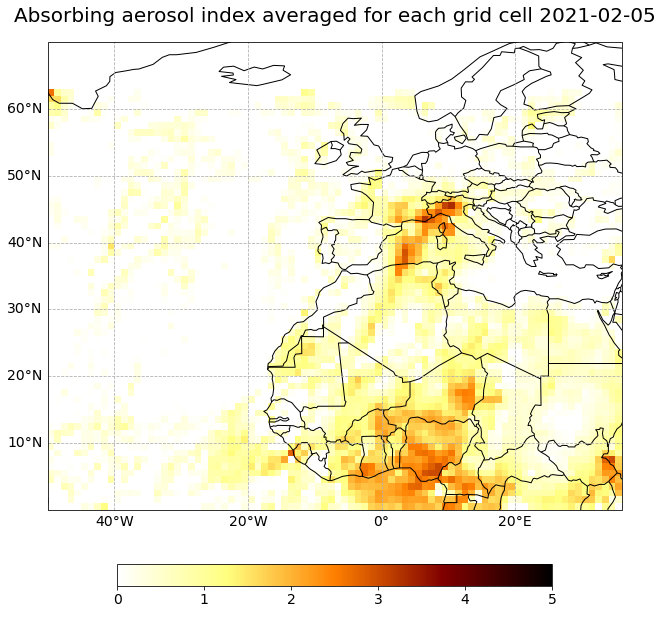

In [21]:
visualize_pcolormesh(data_array=aai_combined[1,:,:],
                     longitude=aai_combined.longitude, 
                     latitude=aai_combined.latitude,
                     projection=ccrs.PlateCarree(), 
                     color_scale='afmhot_r', 
                     unit=' ',
                     long_name=aai_a.long_name + ' ' + str(aai_combined.time[0].dt.strftime('%Y-%m-%d').data), 
                     vmin=0, 
                     vmax=5, 
                     lonmin=-50, 
                     lonmax=36, 
                     latmin=0, 
                     latmax=70.,
                     set_global=False)


## <a id='animate_gome2'></a>6. Animate daily Metop-A/B/C GOME-2 Level 3 Absorbing Aerosol Index (AAI) data between 5 to 7 February 2021

The final step is now to animate the `aai_combined` DataArray over the 3 days to see the dispersion of Aerosols resulting from the Saharan dust event over Spain and France in February 2021.

The animation function consists of four parts:
- **Setting the initial state:**<br>
 Here, you define the general plot your animation shall use to initialise the animation. You can also define the number of frames (time steps) your animation shall have.
 
 
- **Functions to animate:**<br>
 An animation consists of three functions: `draw()`, `init()` and `animate()`. `draw()` is the function where individual frames are passed on and the figure is returned as image. In this example, the function redraws the plot for each time step. `init()` returns the figure you defined for the initial state. `animate()` returns the `draw()` function and animates the function over the given number of frames (time steps).
 
 
- **Create a `animate.FuncAnimation` object:** <br>
 The functions defined before are now combined to build an `animate.FuncAnimation` object.
 
 
- **Play the animation as video:**<br>
 As a final step, you can integrate the animation into the notebook with the `HTML` class. You take the generate animation object and convert it to a HTML5 video with the `to_html5_video` function

In [24]:
# Setting the initial state:
# 1. Define figure for initial plot
fig, ax = visualize_pcolormesh(data_array=aai_combined[0,:,:],
                               longitude=aai_combined.longitude, 
                               latitude=aai_combined.latitude,
                               projection=ccrs.PlateCarree(), 
                               color_scale='afmhot_r', 
                               unit=' ',
                               long_name=aai_a.long_name + '/' + str(aai_combined.time[0].dt.strftime('%Y-%m-%d').data), 
                               vmin=0, 
                               vmax=6, 
                               lonmin=-20, 
                               lonmax=36, 
                               latmin=20, 
                               latmax=70.,
                               set_global=False)


frames = 3


def draw(i):
    img = plt.pcolormesh(aai_combined.longitude, 
                         aai_combined.latitude, 
                         aai_combined[i,:,:], 
                         cmap='afmhot_r', 
                         transform=ccrs.PlateCarree(),
                         vmin=0,
                         vmax=6)
    ax.set_title(aai_a.long_name + ' ' + str(aai_combined.time[i].dt.strftime('%Y-%m-%d').data),
                fontsize=20, pad=20.0)
    return img


def init():
    return fig


def animate(i):
    return draw(i)

ani = animation.FuncAnimation(fig, animate, frames, interval=800, blit=False,
                              init_func=init, repeat=True)

HTML(ani.to_html5_video())
plt.close(fig)


#### Play the animation as HTML5 video

In [25]:
HTML(ani.to_html5_video())